# Missing Values

Missing values occur when no data value is stored for the variable in an observation and are most often represented with a NULL or None. Not handling them can lead to unexpected results (for example, some ML algorithms can't handle missing values at all) and worse, it can lead to incorrect conclusions.

There are 3 main types of missing values:

<ul class="ul_content">
 <li><b>MCAR (Missing Completely at Random)</b> : The events that lead to any particular data-item being missing occur entirely at random. For example, in IOT, we can lose sensory data in transmission.</li>
 <li><b>MAR (Missing {Conditionally} at Random)</b> : Missing data doesn't happen at random and is instead related to some of the observed data. For example, some students may have not answered to some specific questions of a test because they were absent during the relevant lesson.</li>
 <li><b>MNAR (Missing not at Random)</b> : The value of the variable that’s missing is related to the reason it’s missing. For example, if someone didn’t subscribe to a loyalty program, we can leave the cell empty.</li>
</ul>

Different types of missing values tend to suggest different methods for imputing them. For example, when dealing with MCAR values, you can use  mathematical aggregations to impute the missing values. For MNAR values, we can simply create another category. MAR values, however, we'll need to do some more investigation before deciding how to impute the data. 

To see how to handle missing values in VerticaPy, we'll use the well-known 'Titanic' dataset.

,123pclassInt,123survivedInt,AbcVarchar(164),AbcsexVarchar(20),"123ageNumeric(6,3)",123sibspInt,123parchInt,AbcticketVarchar(36),"123fareNumeric(10,5)",AbccabinVarchar(30),AbcembarkedVarchar(20),AbcboatVarchar(100),123bodyInt,Abchome.destVarchar(100)
1,1,0,,female,2.0,1,2,113781,151.55,C22 C26,S,[null],[null],"Montreal, PQ / Chesterville, ON"
2,1,0,,male,30.0,1,2,113781,151.55,C22 C26,S,[null],135,"Montreal, PQ / Chesterville, ON"
3,1,0,,female,25.0,1,2,113781,151.55,C22 C26,S,[null],[null],"Montreal, PQ / Chesterville, ON"
4,1,0,,male,39.0,0,0,112050,0.0,A36,S,[null],[null],"Belfast, NI"
5,1,0,,male,71.0,0,0,PC 17609,49.5042,[null],C,[null],22,"Montevideo, Uruguay"
6,1,0,,male,47.0,1,0,PC 17757,227.525,C62 C64,C,[null],124,"New York, NY"
7,1,0,,male,[null],0,0,PC 17318,25.925,[null],S,[null],[null],"New York, NY"
8,1,0,,male,24.0,0,1,PC 17558,247.5208,B58 B60,C,[null],[null],"Montreal, PQ"
9,1,0,,male,36.0,0,0,13050,75.2417,C6,C,A,[null],"Winnipeg, MN"
10,1,0,,male,25.0,0,0,13905,26.0,[null],C,[null],148,"San Francisco, CA"

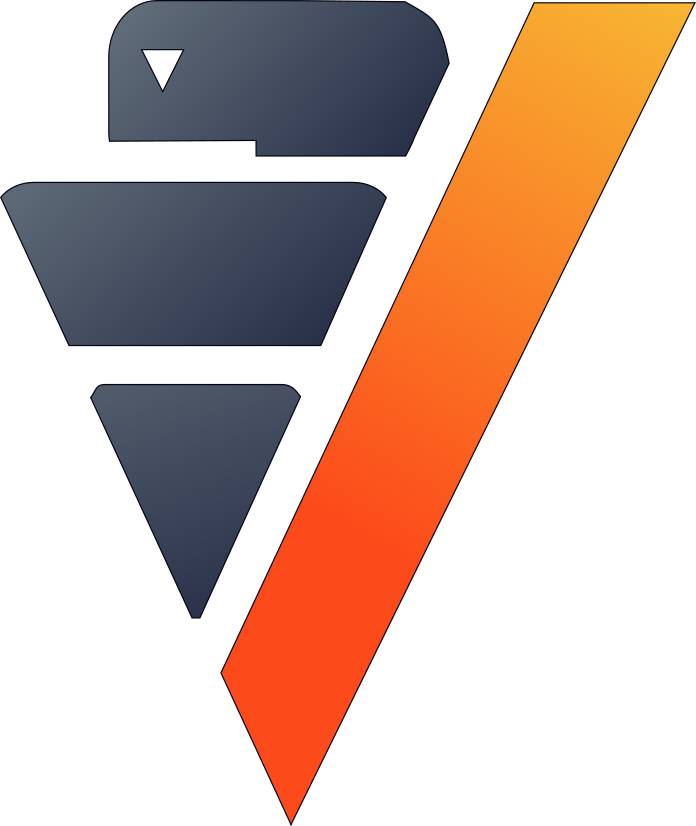

In [64]:
from verticapy.datasets import load_titanic
vdf = load_titanic()
display(vdf)

We can examine the missing values with the 'count' method.

,count,percent
"""pclass""",1234.0,100.0
"""survived""",1234.0,100.0
"""name""",1234.0,100.0
"""sex""",1234.0,100.0
"""sibsp""",1234.0,100.0
"""parch""",1234.0,100.0
"""ticket""",1234.0,100.0
"""fare""",1233.0,99.919
"""embarked""",1232.0,99.838
"""age""",997.0,80.794

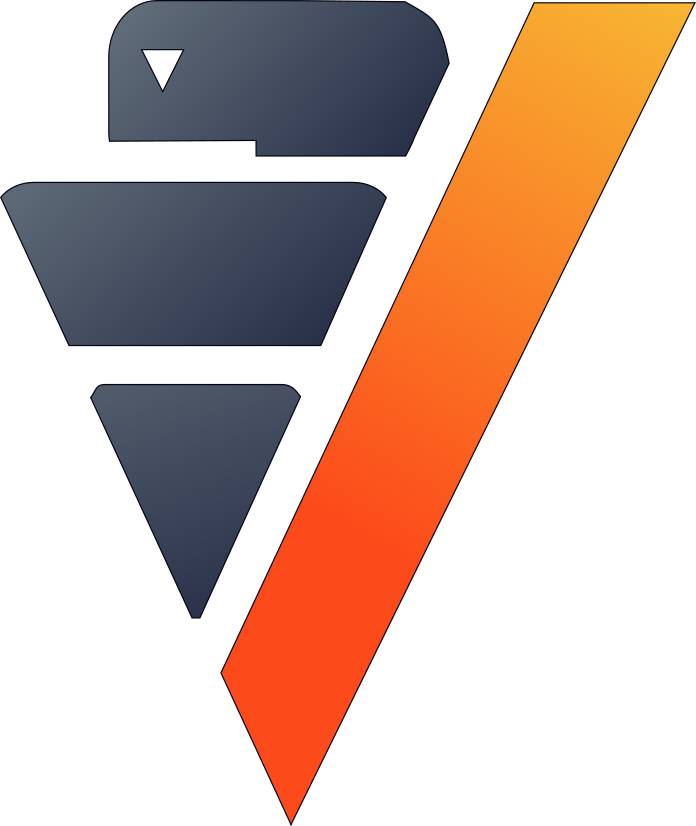

In [66]:
vdf.count_percent()

The missing values for 'boat' are MNAR; missing values simply indicate that the passengers didn't pay for a lifeboat. We can replace all the missing values with a new category 'No Lifeboat' using the 'fillna' method.

795 elements were filled.


,AbcboatVarchar(100)
1,No Lifeboat
2,No Lifeboat
3,No Lifeboat
4,No Lifeboat
5,No Lifeboat
6,No Lifeboat
7,No Lifeboat
8,No Lifeboat
9,A
10,No Lifeboat

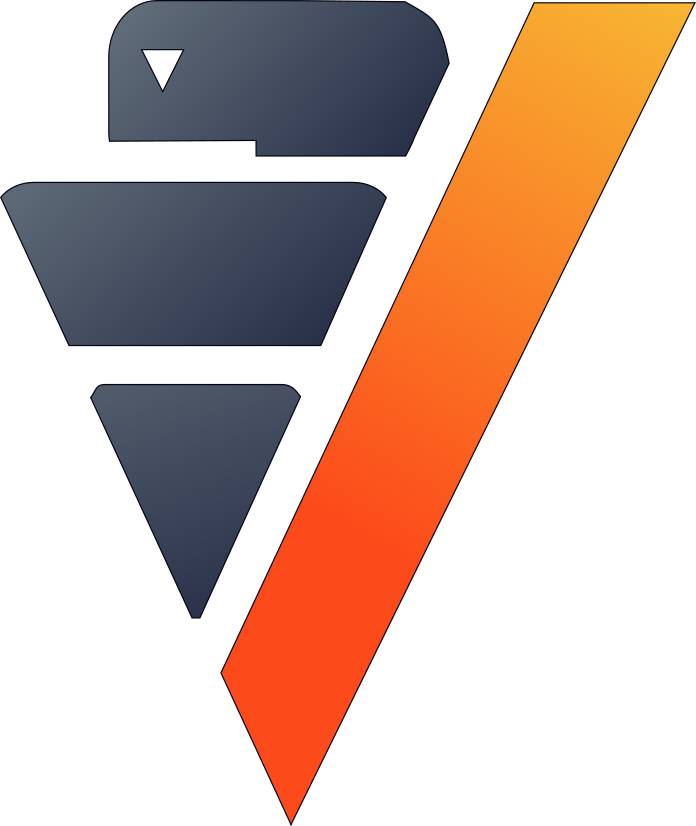

In [67]:
vdf["boat"].fillna("No Lifeboat")
vdf["boat"]

Missing values for 'age' seem to be MCAR, so the best way to impute them is with mathematical aggregations. Let's impute the age using the average age of passengers of the same sex and class.

237 elements were filled.


,123ageFloat
1,36.0
2,31.0
3,21.0
4,50.0
5,45.0
6,31.0
7,55.0
8,60.0
9,35.0
10,37.2635658914729

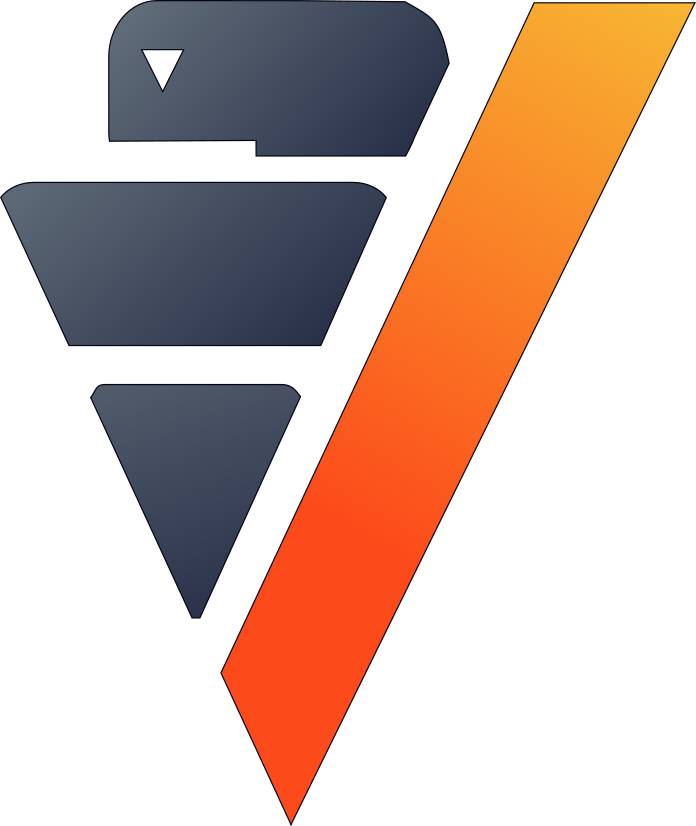

In [68]:
vdf["age"].fillna(method = "avg",
                  by = ["pclass", "sex"])
vdf["age"]

The features 'embarked' and 'fare' have a couple missing values. Instead of using a technique to impute them, we can just drop them with the 'dropna' method.

1 element was filtered.
2 elements were filtered.


,123pclassInt,123survivedInt,AbcVarchar(164),AbcsexVarchar(20),"123ageNumeric(6,3)",123sibspInt,123parchInt,AbcticketVarchar(36),"123fareNumeric(10,5)",AbccabinVarchar(30),AbcembarkedVarchar(20),AbcboatVarchar(100),123bodyInt,AbcVarchar(100)
1,1,1,,female,36.0,0,0,PC 17760,135.6333,C32,C,8,[null],
2,1,1,,female,31.0,0,0,16966,134.5,E39 E41,C,3,[null],
3,1,1,,female,21.0,0,0,113795,26.55,[null],S,8 10,[null],
4,1,1,,female,50.0,1,1,113503,211.5,C80,C,4,[null],
5,1,1,,female,45.0,1,1,36928,164.8667,[null],S,8,[null],
6,1,1,,female,31.0,0,2,36928,164.8667,C7,S,8,[null],
7,1,1,,female,55.0,0,0,PC 17760,135.6333,C32,C,8,[null],
8,1,1,,female,60.0,1,0,110813,75.25,D37,C,5,[null],
9,1,1,,female,35.0,0,0,PC 17755,512.3292,[null],C,3,[null],
10,1,1,,female,37.2635658914729,0,0,PC 17585,79.2,[null],C,D,[null],

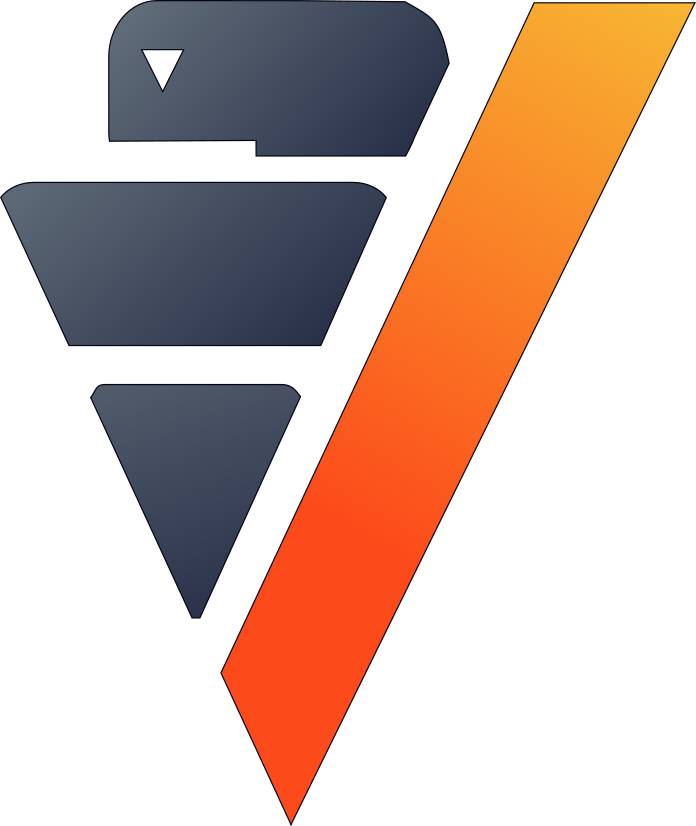

In [69]:
vdf["fare"].dropna()
vdf["embarked"].dropna()

The 'fillna' method offers many options. Let's use the 'help' method to view its parameters.

In [70]:
help(vdf["embarked"].fillna)

Help on method fillna in module verticapy.vcolumn:

fillna(val=None, method:str='auto', expr:str='', by:list=[], order_by:list=[]) method of verticapy.vcolumn.vColumn instance
        ---------------------------------------------------------------------------
        Fills missing elements in the vColumn with a user-specified rule.
    
        Parameters
        ----------
        val: int/float/str, optional
                Value to use to impute the vColumn.
        method: dict, optional
                Method to use to impute the missing values.
                        auto    : Mean for the numerical and Mode for the categorical vColumns.
                        bfill   : Back Propagation of the next element (Constant Interpolation).
                        ffill   : Propagation of the first element (Constant Interpolation).
                        mean    : Average.
                        median  : median.
                        mode    : mode (most occurent element).
        

In [72]:
print(vdf.current_relation())

(
   SELECT
     * 
   FROM
 (
   SELECT
     "pclass",
     "survived",
     "name",
     "sex",
     COALESCE("age", AVG("age") OVER (PARTITION BY "pclass", "sex")) AS "age",
     "sibsp",
     "parch",
     "ticket",
     "fare",
     "cabin",
     "embarked",
     COALESCE("boat", 'No Lifeboat') AS "boat",
     "body",
     "home.dest" 
   FROM
 "public"."titanic") 
VERTICAPY_SUBTABLE WHERE ("fare" IS NOT NULL) AND ("embarked" IS NOT NULL)) 
VERTICAPY_SUBTABLE


Depending on the circumstances, we'll need to investigate to find the most suitable solution. Let's take the following dataset as an example.

,010damage_infrastructureBoolean,123lonFloat,Abcinformation_sourceVarchar(30),📅date_agentTimestamp,Abclocation_detailVarchar(50),📅dateTimestamp,📅date_ambulanceTimestamp,123latFloat,AbclightingVarchar(40),AbccauseVarchar(46),123index_nullInt,Abctraveling_reasonVarchar(54),123autoroute_position_kmInt,AbcweatherVarchar(24),AbcVarchar(74),123autoroute_idInt,123traffic_directionInt,📅date_gendarmeTimestamp,📅date_fmTimestamp,AbcpavementVarchar(34),AbclocationVarchar(32),AbcvisibilityVarchar(20),AbcequipmentVarchar(20),Abcinformation_centerVarchar(20),123idInt,📅date_tow_truckTimestamp
1,❌,-8.0075506538,Usager,2015-01-28 07:40:00,ITPC,2015-01-28 07:38:00,2015-01-28 08:13:00,33.3434970408,Eblouissement,Défaillance physique,0,Promenade-Loisirs,127,Brouillard,,1,1,2015-01-28 08:25:00,[null],Mouillée,Section courante,Moyenne,NM,CEJ,21728,2015-01-28 07:50:00
2,❌,-7.7395617143,Usager,2015-04-02 06:59:00,BAU,2015-04-02 06:46:00,[null],33.4558199012,Eblouissement,Faute de conduite,0,Domicile-Travail,98,Brouillard,,1,2,[null],[null],Mouillée,Section courante,Mauvaise,MAT,CEJ,22742,2015-04-02 07:33:00
3,❌,-7.5729650459,Usager,2015-04-02 07:12:00,ITPC,2015-04-02 06:50:00,[null],33.523943665,Eblouissement,Faute de conduite,0,Domicile-Travail,80,Brouillard,,1,2,[null],[null],Mouillée,Section courante,Mauvaise,MAT,CEJ,22743,2015-04-02 07:14:00
4,❌,-7.5722580755,Usager,2015-11-09 00:15:00,BAU,2015-11-09 00:00:00,[null],33.2314580349,Eblouissement,Faute de conduite,0,Domicile-Travail,34,Brouillard,,3,2,[null],[null],Mouillée,Section courante,Mauvaise,MAT,CEBS,25983,2015-11-09 01:40:00
5,❌,-7.6063929587,Usager,2015-11-09 23:10:00,BAU,2015-11-09 23:00:00,[null],33.3247608645,Eblouissement,Faute de conduite,0,Domicile-Travail,20,Brouillard,,3,1,[null],[null],Mouillée,Section courante,Mauvaise,MAT,CEBS,25982,2015-11-09 23:25:00
6,❌,-7.3977465763,Usager,2015-11-11 01:00:00,BAU,2015-11-11 00:40:00,[null],33.666896915,Eblouissement,Faute de conduite,0,Utilisation professionnelle,57,Brouillard,,1,1,2015-11-11 01:05:00,[null],Mouillée,Section courante,Mauvaise,MAT,CEB,26038,2015-11-11 01:05:00
7,❌,-8.1401754578,Patrouilleur,2016-10-20 08:09:00,Pleine voie,2016-10-20 08:00:00,[null],33.3002125822,Eblouissement,Faute de conduite,0,Domicile-Travail,140,Brouillard,,1,2,2016-10-20 08:50:00,[null],Mouillée,Section courante,Mauvaise,MAT,CEJ,30750,2016-10-20 09:30:00
8,❌,-8.3907879245,Usager,2017-02-17 06:41:00,Pleine voie,2017-02-17 06:25:00,2017-02-17 07:24:00,33.2437285251,Eblouissement,Faute de conduite,1,Domicile-Travail,189,Brouillard,,1,1,2017-02-17 07:46:00,2017-02-17 09:30:00,Mouillée,Section courante,Mauvaise,M,CEJ,32110,2017-02-17 08:00:00
9,✅,-8.2235298826,Patrouilleur,2017-04-06 07:40:00,Pleine voie,2017-04-06 07:36:00,2017-04-06 08:10:00,33.2952454539,Eblouissement,Faute de conduite,0,Promenade-Loisirs,148,Brouillard,,1,2,2017-04-06 08:22:00,[null],Sèche,Section courante,Mauvaise,NM,CEJ,33118,2017-04-06 08:40:00
10,✅,-7.6838664798,Usager,2018-02-19 07:05:00,Pleine voie,2018-02-19 06:50:00,[null],32.8619206464,Eblouissement,Faute de conduite,0,Promenade-Loisirs,80,Brouillard,,3,2,[null],[null],Sèche,Section courante,Mauvaise,MAT,CEBS,37804,2018-02-19 07:00:00

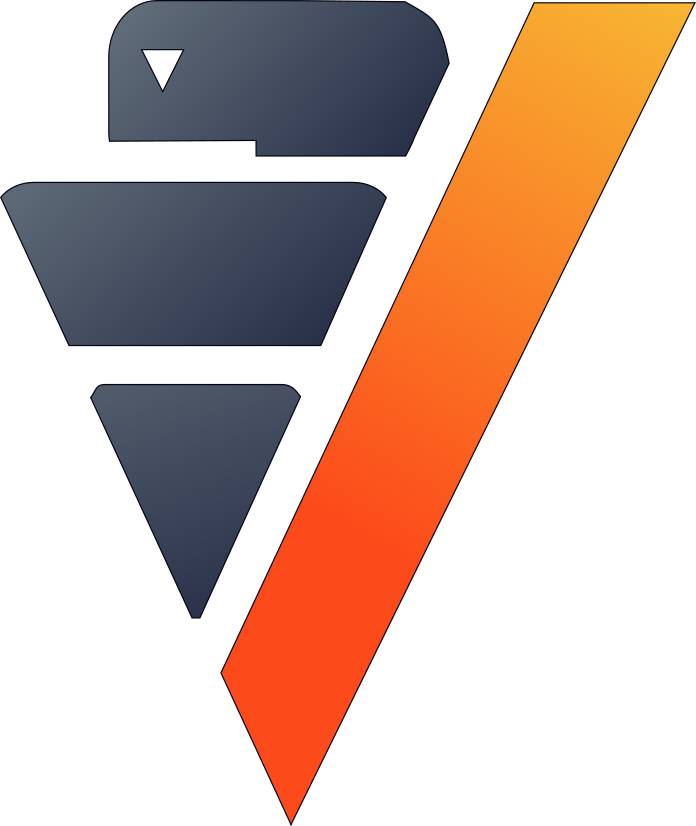

Rows: 1-100 of 23550 | Columns: 26


In [7]:
import verticapy as vp
accidents = vp.read_csv("data/accidents.csv")
display(Accidents)

This dataset contains the latitude and longitude of car accidents in Morocco.

,count,percent
"""id""",23550.0,100.0
"""date""",23550.0,100.0
"""highway_id""",23550.0,100.0
"""traffic_direction""",23550.0,100.0
"""highway_position_km""",23550.0,100.0
"""information_center""",23550.0,100.0
"""equipment""",23550.0,100.0
"""cause""",23550.0,100.0
"""cause_detail""",23550.0,100.0
"""weather""",23550.0,100.0

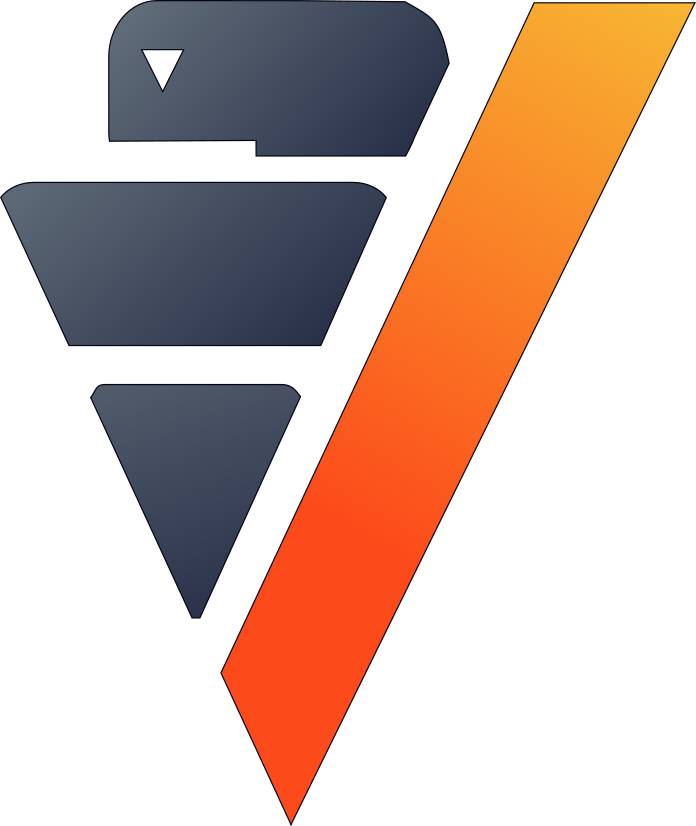

In [12]:
accidents.count_percent()

This dataset is missing a lot of longitude and latitude values. However, we also know the Highway ID and the position of the car in the given highway. Knowing this, we can use interpolation to impute the missing values.

1135 element(s) was/were filled
1135 element(s) was/were filled
1154 element(s) was/were filled
1154 element(s) was/were filled


,123idInt100%,📅dateTimestamp100%,AbclonVarchar(100)97%,123latFloat97%,123highway_idInt100%,123traffic_directionInt100%,123highway_position_kmInt100%,AbclocationVarchar(32)99%,Abclocation_detailVarchar(50)99%,Abcinformation_sourceVarchar(34)98%,Abcinformation_centerVarchar(20)100%,Abcdamage_infrastructureVarchar(20)99%,AbcequipmentVarchar(20)100%,📅date_tow_truckTimestamp80%,📅date_ambulanceTimestamp31%,📅date_gendarmeTimestamp60%,📅date_agentTimestamp97%,📅date_fmTimestamp2%,AbccauseVarchar(46)100%,AbcVarchar(74)100%,AbcweatherVarchar(54)100%,AbclightingVarchar(54)100%,AbcpavementVarchar(54)100%,Abctraveling_reasonVarchar(54)98%,AbcvisibilityVarchar(54)100%
1,26033,2015-11-09 16:14:00,-6.8823455024,33.9683565063,1,1,0,Section courante,Pleine voie,Patrouilleur,CEB,Non,NM,2015-11-09 16:35:00,2015-11-09 16:35:00,2015-11-09 17:05:00,2015-11-09 16:25:00,[null],Faute de conduite,,Temps normal,Plein jour,Sèche,Promenade-Loisirs,Bonne
2,26041,2015-11-13 08:22:00,-6.883341788,33.969118676,1,2,0,Section courante,ITPC,Patrouilleur,CEB,Non,NM,2015-11-13 08:40:00,2015-11-13 08:35:00,2015-11-13 08:25:00,2015-11-13 08:22:00,[null],Faute de conduite,,Temps normal,Plein jour,Sèche,Promenade-Loisirs,Bonne
3,27305,2016-02-20 23:45:00,-6.883341788,33.969118676,1,2,0,Section courante,BAU,Centre d'appel,CEB,Oui,MAT,[null],[null],[null],[null],[null],Faute de conduite,,Temps normal,Nuit sans éclairage,Sèche,Promenade-Loisirs,Moyenne
4,30477,2016-09-15 20:15:00,-6.883341788,33.969118676,1,2,0,Section courante,Pleine voie,Agent ADM,CEB,Non,NM,2016-09-15 20:19:00,2016-09-15 20:22:00,2016-09-15 20:28:00,2016-09-15 20:31:00,[null],Obstacle sur chaussée,,Temps normal,Nuit sans éclairage,Sèche,Promenade-Loisirs,Moyenne
5,31645,2016-11-14 08:30:00,-6.8823455024,33.9683565063,1,1,0,Section courante,Pleine voie,Centre d'appel,CEB,Non,MAT,[null],[null],2016-11-14 09:07:00,[null],[null],Faute de conduite,,Temps normal,Plein jour,Sèche,Utilisation professionnelle,Bonne
6,32595,2017-04-21 13:40:00,-6.8823455024,33.9683565063,1,1,0,Section courante,BAU,Patrouilleur,CEB,Non,MAT,2017-04-21 13:59:00,[null],[null],2017-04-21 13:50:00,[null],Faute de conduite,,Temps normal,Plein jour,Sèche,Promenade-Loisirs,Bonne
7,33356,2017-06-04 17:21:00,-6.8823455024,33.9683565063,1,1,0,Section courante,BAU,Centre d'appel,CEB,Non,NM,[null],2017-06-04 17:43:00,2017-06-04 17:43:00,2017-06-04 17:45:00,[null],Faute de conduite,,Temps normal,Plein jour,Sèche,Promenade-Loisirs,Bonne
8,37053,2017-12-09 21:15:00,-6.8823455024,33.9683565063,1,1,0,Section courante,Pleine voie,Patrouilleur,CEB,Non,MAT,[null],[null],[null],2017-12-09 21:15:00,[null],Faute de conduite,,Temps normal,Nuit sans éclairage,Sèche,Promenade-Loisirs,Moyenne
9,39945,2018-04-09 00:30:00,-6.883341788,33.969118676,1,2,0,Section courante,BAU,Centre d'appel,CEB,Non,MAT,[null],[null],2018-04-09 00:40:00,2018-04-09 00:30:00,[null],Obstacle sur chaussée,,Temps normal,Nuit sans éclairage,Sèche,Promenade-Loisirs,Moyenne
10,40629,2018-05-27 15:50:00,-6.8823455024,33.9683565063,1,1,0,Echangeur,Bretelle entrée,Patrouilleur,CEB,Non,NM,2018-05-27 15:50:00,2018-05-27 15:50:00,2018-05-27 15:50:00,2018-05-27 15:50:00,[null],Faute de conduite,,Temps normal,Plein jour,Sèche,Utilisation professionnelle,Bonne

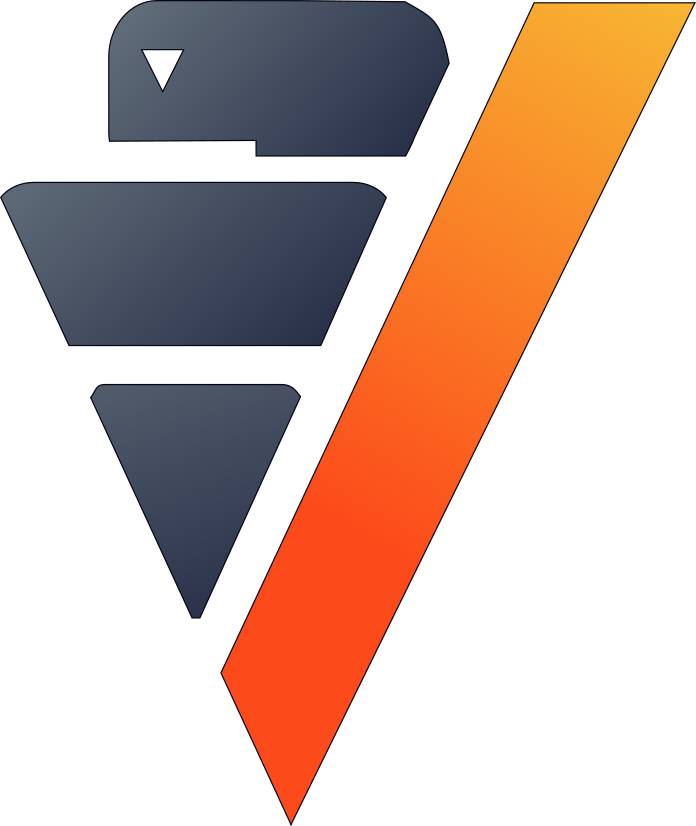

Rows: 1-100 of 23550 | Columns: 25

In [14]:
# First Propagation
accidents["lat"].fillna(method = "ffill",
                        by = ["highway_id"],
                        order_by = ["highway_position_km"])
accidents["lon"].fillna(method = "ffill",
                        by = ["highway_id"],
                        order_by = ["highway_position_km"])
# Back Propagation
accidents["lat"].fillna(method = "bfill",
                        by = ["highway_id"],
                        order_by = ["highway_position_km"])
accidents["lon"].fillna(method = "bfill",
                        by = ["highway_id"],
                        order_by = ["highway_position_km"])

We still have some missing values because we don't have a longitude or latitude for certain highways.

,count,percent
"""id""",23550.0,100.0
"""date""",23550.0,100.0
"""highway_id""",23550.0,100.0
"""traffic_direction""",23550.0,100.0
"""highway_position_km""",23550.0,100.0
"""information_center""",23550.0,100.0
"""equipment""",23550.0,100.0
"""cause""",23550.0,100.0
"""cause_detail""",23550.0,100.0
"""weather""",23550.0,100.0

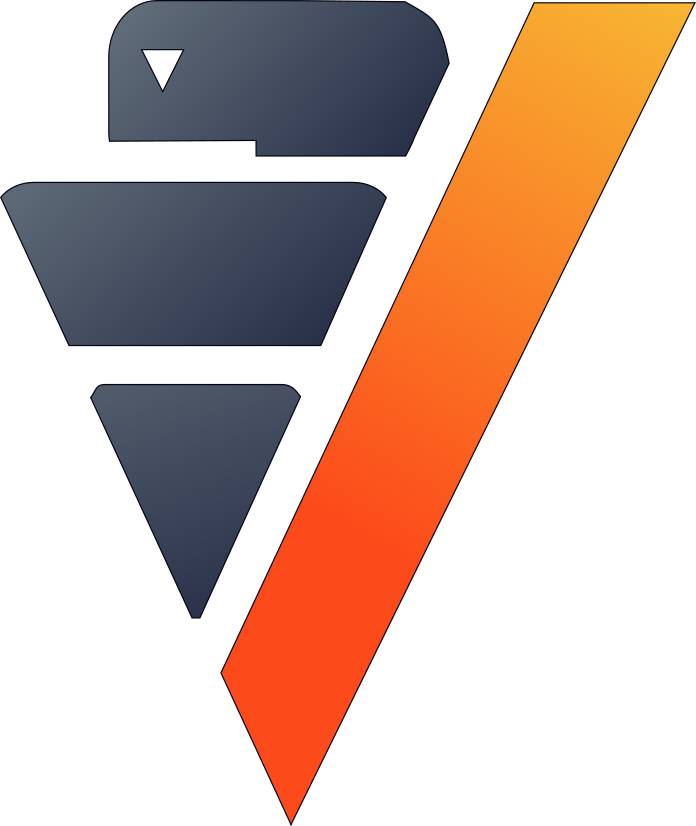

In [16]:
Accidents.count_percent()

We can still investigate this on our own and find the longitude and latitude of the highways in question and then use interpolation to fill the missing values.

Here's what we found:

<b>Autoroute A4 Berrechid - Beni Mellal (Berrechid - Khouribga - Beni Mellal)</b>

<ul class="ul_content">
 <li>Beni Mellal: lat = 32.339444 lon = -6.360833</li>
 <li>Khouribga: lat = 32.886023 lon = -6.9208655</li>
 <li>Berrechid: lat = 33.26553 lon = -7.58754</li>
</ul>
 
<b>Route 103 El Jadida information</b>

<ul class="ul_content">
 <li>El Jadida: lat = 33.233334 lon = -8.500000</li>
</ul>

Let's do the interpolations.

,123idInt100%,📅dateTimestamp100%,AbclonVarchar(100)97%,123latFloat97%,123highway_idInt100%,123traffic_directionInt100%,123highway_position_kmInt100%,AbclocationVarchar(32)99%,Abclocation_detailVarchar(50)99%,Abcinformation_sourceVarchar(34)98%,Abcinformation_centerVarchar(20)100%,Abcdamage_infrastructureVarchar(20)99%,AbcequipmentVarchar(20)100%,📅date_tow_truckTimestamp80%,📅date_ambulanceTimestamp31%,📅date_gendarmeTimestamp60%,📅date_agentTimestamp97%,📅date_fmTimestamp2%,AbccauseVarchar(46)100%,AbcVarchar(74)100%,AbcweatherVarchar(54)100%,AbclightingVarchar(54)100%,AbcpavementVarchar(54)100%,Abctraveling_reasonVarchar(54)98%,AbcvisibilityVarchar(54)100%
1,26033,2015-11-09 16:14:00,-6.8823455024,33.9683565063,1,1,0,Section courante,Pleine voie,Patrouilleur,CEB,Non,NM,2015-11-09 16:35:00,2015-11-09 16:35:00,2015-11-09 17:05:00,2015-11-09 16:25:00,[null],Faute de conduite,,Temps normal,Plein jour,Sèche,Promenade-Loisirs,Bonne
2,26041,2015-11-13 08:22:00,-6.883341788,33.969118676,1,2,0,Section courante,ITPC,Patrouilleur,CEB,Non,NM,2015-11-13 08:40:00,2015-11-13 08:35:00,2015-11-13 08:25:00,2015-11-13 08:22:00,[null],Faute de conduite,,Temps normal,Plein jour,Sèche,Promenade-Loisirs,Bonne
3,27305,2016-02-20 23:45:00,-6.883341788,33.969118676,1,2,0,Section courante,BAU,Centre d'appel,CEB,Oui,MAT,[null],[null],[null],[null],[null],Faute de conduite,,Temps normal,Nuit sans éclairage,Sèche,Promenade-Loisirs,Moyenne
4,30477,2016-09-15 20:15:00,-6.883341788,33.969118676,1,2,0,Section courante,Pleine voie,Agent ADM,CEB,Non,NM,2016-09-15 20:19:00,2016-09-15 20:22:00,2016-09-15 20:28:00,2016-09-15 20:31:00,[null],Obstacle sur chaussée,,Temps normal,Nuit sans éclairage,Sèche,Promenade-Loisirs,Moyenne
5,31645,2016-11-14 08:30:00,-6.8823455024,33.9683565063,1,1,0,Section courante,Pleine voie,Centre d'appel,CEB,Non,MAT,[null],[null],2016-11-14 09:07:00,[null],[null],Faute de conduite,,Temps normal,Plein jour,Sèche,Utilisation professionnelle,Bonne
6,32595,2017-04-21 13:40:00,-6.8823455024,33.9683565063,1,1,0,Section courante,BAU,Patrouilleur,CEB,Non,MAT,2017-04-21 13:59:00,[null],[null],2017-04-21 13:50:00,[null],Faute de conduite,,Temps normal,Plein jour,Sèche,Promenade-Loisirs,Bonne
7,33356,2017-06-04 17:21:00,-6.8823455024,33.9683565063,1,1,0,Section courante,BAU,Centre d'appel,CEB,Non,NM,[null],2017-06-04 17:43:00,2017-06-04 17:43:00,2017-06-04 17:45:00,[null],Faute de conduite,,Temps normal,Plein jour,Sèche,Promenade-Loisirs,Bonne
8,37053,2017-12-09 21:15:00,-6.8823455024,33.9683565063,1,1,0,Section courante,Pleine voie,Patrouilleur,CEB,Non,MAT,[null],[null],[null],2017-12-09 21:15:00,[null],Faute de conduite,,Temps normal,Nuit sans éclairage,Sèche,Promenade-Loisirs,Moyenne
9,39945,2018-04-09 00:30:00,-6.883341788,33.969118676,1,2,0,Section courante,BAU,Centre d'appel,CEB,Non,MAT,[null],[null],2018-04-09 00:40:00,2018-04-09 00:30:00,[null],Obstacle sur chaussée,,Temps normal,Nuit sans éclairage,Sèche,Promenade-Loisirs,Moyenne
10,40629,2018-05-27 15:50:00,-6.8823455024,33.9683565063,1,1,0,Echangeur,Bretelle entrée,Patrouilleur,CEB,Non,NM,2018-05-27 15:50:00,2018-05-27 15:50:00,2018-05-27 15:50:00,2018-05-27 15:50:00,[null],Faute de conduite,,Temps normal,Plein jour,Sèche,Utilisation professionnelle,Bonne

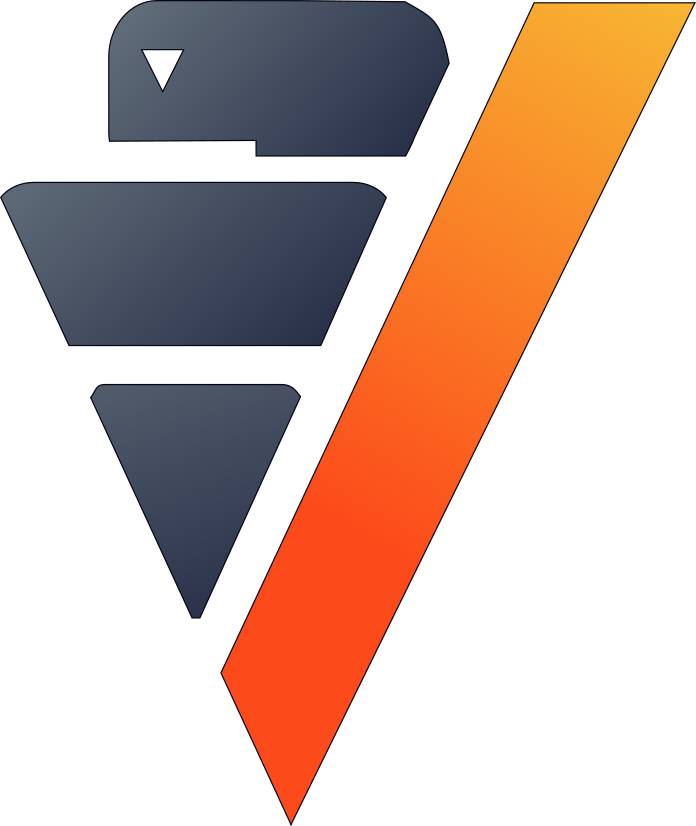

Rows: 1-100 of 23550 | Columns: 25

In [18]:
import verticapy.stats as st
accidents["lat"] = st.case_when((accidents["highway_id"] == 4) & 
                                (accidents["highway_id"] <= 77), 
                                33.26553 * (1 - accidents["highway_position_km"] / 77) 
                                + 32.886023 * (accidents["highway_position_km"] / 77),
                                (accidents["highway_id"] == 4) & 
                                (accidents["highway_id"] >= 77),
                                32.886023 * (1 - (accidents["highway_position_km"] - 77) / 95) 
                                + 32.339444 * ((accidents["highway_position_km"] - 77) / 95),
                                (accidents["highway_id"] == 103),
                                33.2415617419 * (1 - (accidents["highway_position_km"] / 5) 
                                + 33.233334 * (accidents["highway_position_km"] / 5)))

accidents["lon"] = st.case_when((accidents["highway_id"] == 4) & 
                                (accidents["highway_id"] <= 77), 
                                -7.58754 * (1 - accidents["highway_position_km"] / 77) 
                                - 6.9208655 * (accidents["highway_position_km"] / 77),
                                (accidents["highway_id"] == 4) & 
                                (accidents["highway_id"] >= 77),
                                -6.9208655 * (1 - (accidents["highway_position_km"] - 77) / 95) 
                                - 6.360833 * ((accidents["highway_position_km"] - 77) / 95),
                                (accidents["highway_id"] == 103),
                                - 8.3952503827 * (1 - (accidents["highway_position_km"] / 5) 
                                - 8.500000 * (accidents["highway_position_km"] / 5)))

Here's the same map after we interpolated the missing values:

<AxesSubplot:xlabel='"lon"', ylabel='"lat"'>

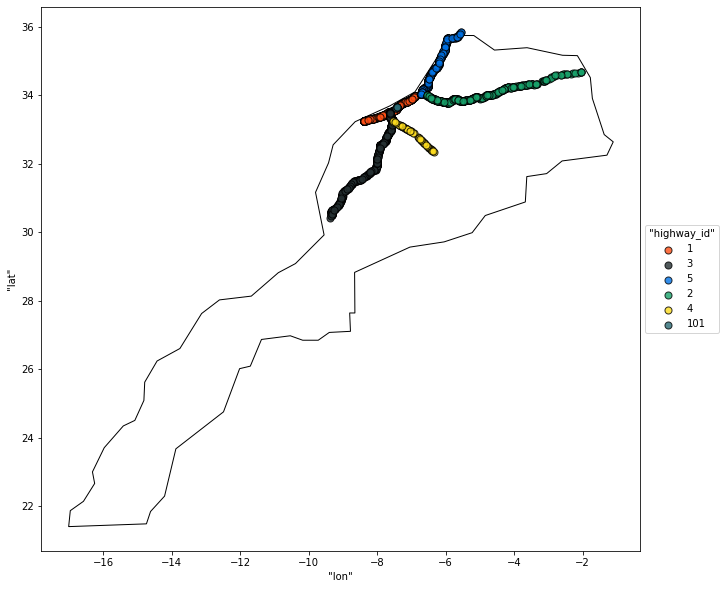

In [18]:
from verticapy.datasets import load_world

# Filtering Morocco
morocco = load_world()
morocco = morocco[morocco["country"] == "Morocco"]
ax = morocco["geometry"].geo_plot(color = "white",
                                  edgecolor='black',)

# Displaying Highways
accidents.scatter(["lon", "lat"],
                  by = "highway_id",
                  ax = ax)

In conclusion, before imputing missing data, you have to understand why it might be missing and how it relates to the rest of your dataset.